# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [9]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
4s - loss: 0.4378 - acc: 0.8828 - val_loss: 0.2179 - val_acc: 0.9411
Epoch 2/10
3s - loss: 0.1909 - acc: 0.9457 - val_loss: 0.1552 - val_acc: 0.9558
Epoch 3/10
3s - loss: 0.1353 - acc: 0.9618 - val_loss: 0.1258 - val_acc: 0.9648
Epoch 4/10
3s - loss: 0.1026 - acc: 0.9703 - val_loss: 0.1119 - val_acc: 0.9684
Epoch 5/10
2s - loss: 0.0809 - acc: 0.9772 - val_loss: 0.0980 - val_acc: 0.9715
Epoch 6/10
3s - loss: 0.0659 - acc: 0.9819 - val_loss: 0.0936 - val_acc: 0.9718
Epoch 7/10
3s - loss: 0.0544 - acc: 0.9853 - val_loss: 0.0915 - val_acc: 0.9735
Epoch 8/10
2s - loss: 0.0460 - acc: 0.9876 - val_loss: 0.0828 - val_acc: 0.9765
Epoch 9/10
2s - loss: 0.0381 - acc: 0.9902 - val_loss: 0.0822 - val_acc: 0.9762
Epoch 10/10
2s - loss: 0.0316 - acc: 0.9915 - val_loss: 0.0807 - val_acc: 0.9763


# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

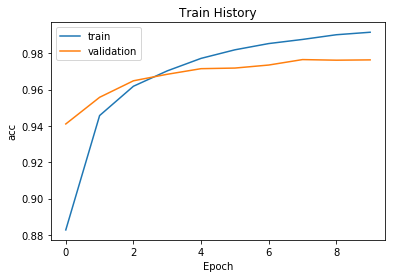

In [14]:
show_train_history(train_history,'acc','val_acc')

In [15]:
# train_history.history['val_acc']

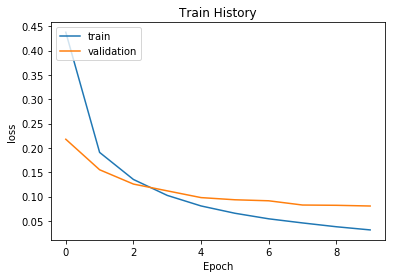

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

 9280/10000 [==========================>...] - ETA: 0s()
('accuracy=', 0.97609999999999997)


# 進行預測

In [18]:
prediction=model.predict_classes(x_Test)

 9408/10000 [===========================>..] - ETA: 0s

In [19]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

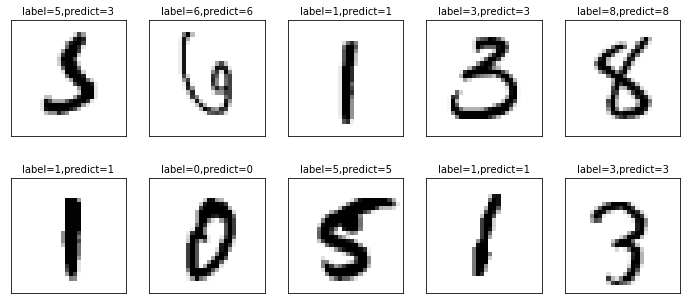

In [21]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [22]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,1,1,0,2,5,8,0
3,0,0,5,991,0,1,0,4,5,4
4,1,0,5,1,962,0,2,0,3,8
5,3,0,0,15,1,853,7,1,9,3
6,5,3,3,1,3,3,938,0,2,0
7,0,5,12,6,1,0,0,989,7,8
8,5,0,3,6,2,1,1,2,953,1


In [23]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [24]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


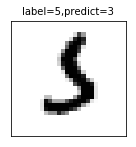

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

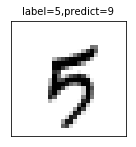

In [26]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

# Check weights

In [27]:
myWeights = model.get_weights()

In [28]:
len(myWeights)

4

In [29]:
myWeights

[array([[ 0.03526075, -0.0285708 , -0.0644187 , ..., -0.0242259 ,
         -0.02685   , -0.01857186],
        [-0.00982405,  0.07419233, -0.04359968, ..., -0.00261575,
         -0.01225921,  0.01453428],
        [-0.03527654, -0.03277713,  0.03805391, ...,  0.06329982,
          0.02873558, -0.00079627],
        ..., 
        [-0.01557423,  0.03201263, -0.08430084, ...,  0.03184119,
          0.02579133,  0.03271532],
        [-0.00199518,  0.0634909 , -0.07152043, ...,  0.03295358,
         -0.01675252,  0.05780223],
        [-0.04896085,  0.12540601, -0.04547846, ..., -0.01283062,
          0.02980015,  0.01915948]], dtype=float32),
 array([  3.03582437e-02,   3.48896645e-02,   1.17281722e-02,
         -5.31390542e-03,   7.39170238e-02,   2.68876143e-02,
         -3.70185375e-02,   6.41769469e-02,  -5.78127950e-02,
          7.89973326e-03,   1.74340196e-02,   2.16055904e-02,
          4.24819104e-02,   3.94645333e-02,  -1.31871309e-02,
          6.55722944e-03,   3.63530330e-02,   1

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [31]:
len(myWeights[1])

256

In [32]:
len(myWeights[2][0])

10

In [33]:
myWeights[2][0][9]

0.17613485

In [34]:
len(myWeights[3])

10

In [66]:
myWeights[0][0][0:2].shape

(2,)

In [96]:
myWeights[0][:,0].shape

(784,)

In [101]:
img = myWeights[0][:,0].reshape(28,28)

In [102]:
import matplotlib.pyplot as plt

In [109]:
plt.imshow(img, cmap='gray')

In [107]:
plt.colorbar()

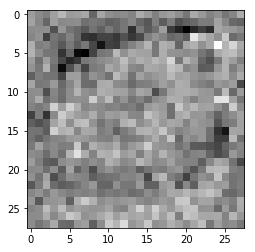

In [110]:
plt.show()

In [111]:
fig = plt.gcf()
fig.set_size_inches(12, 12)

In [113]:
for i in range (0, 256):
    img = myWeights[0][:,i].reshape(28,28)
    ax = plt.subplot(16, 16, i+1)
    ax.imshow(img, cmap='gray')
    ax.set_xticks([]); ax.set_yticks([]);
    

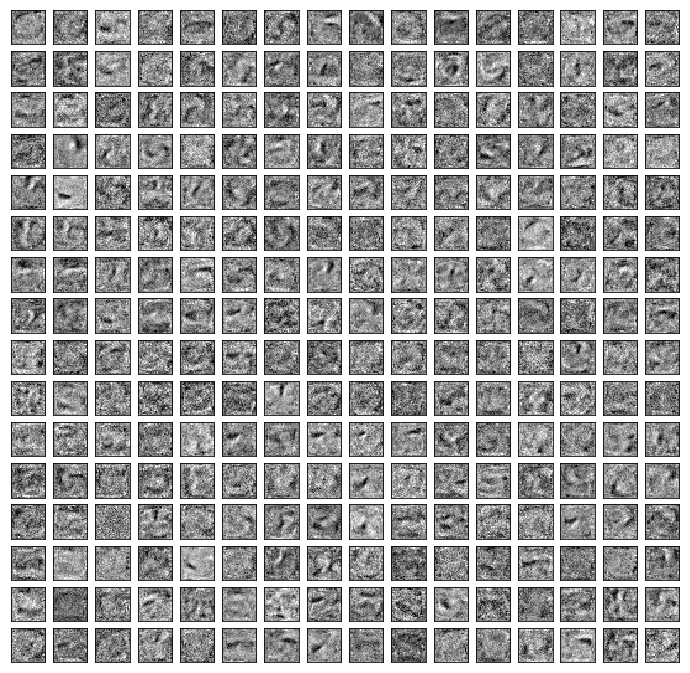

In [114]:
plt.show()